In [20]:
from pycollisiondb.pycollisiondb import PyCollision
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The official ALADDIN2 server.
#DB_URL = 'https://db-amdis.org/aladdin2/'
# The official CollisionDB server.
DB_URL = 'https://db-amdis.org/collisiondb/'
# Local URL for whatever service is listening on port 8282.
#DB_URL = 'http://127.0.0.1:8282/'

In [4]:
# Fetch datasets from the server over the API.
# Proton-impact ionization of H.
#query = {'reactants': ['H+', 'H 1s'],
#         'process_types': ['HIN'],
#         'data_type': 'cross section',}
query = {'pks': [102737, 107356, 103103, 103104]}

pycoll = PyCollision.get_datasets(query=query, DB_URL=DB_URL)

# If you're accessing a locally-cached archive instead, do it here.
#DATA_DIR = '/Users/christian/www/colldb_results'
#archive_uuid = '026a7abd-5ed7-4e30-827d-f3f606f3fa98'
#pycoll = PyCollision.get_datasets(archive_uuid=archive_uuid, DATA_DIR=DATA_DIR)

H+ + H 1s → H+ + H+ + e-
H 1s + H+ → H+ + H+ + e-
H 1s + H+ → H+ + H+ + e-
H+ + H 1s → H+ + H+ + e-


In [5]:
# How many did we get?
len(pycoll.datasets)

4

In [6]:
# What are they (a dict, keyed by pk ID).
pycoll.datasets

{102737: D102737: H+ + H 1s → H+ + H+ + e-,
 103103: D103103: H 1s + H+ → H+ + H+ + e-,
 103104: D103104: H 1s + H+ → H+ + H+ + e-,
 107356: D107356: H+ + H 1s → H+ + H+ + e-}

In [7]:
pycoll.summarize_datasets()

H+ + H 1s → H+ + H+ + e-
   qid: D102737
   process_types: ['HIN']
   data_type: cross section
   refs: {'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
   qid: D107356
   process_types: ['HIN']
   data_type: cross section
   refs: {'B45': {'doi': '10.1140/epjd/e2019-100380-x'}}

H 1s + H+ → H+ + H+ + e-
   qid: D103103
   process_types: ['HIN']
   data_type: cross section
   refs: {'B33': {'doi': '10.1088/0022-3700/14/14/009'}}
   qid: D103104
   process_types: ['HIN']
   data_type: cross section
   refs: {'B34': {'doi': '10.1088/0022-3700/20/11/016'}}



In [8]:
pycoll.datasets[102737].x, pycoll.datasets[102737].y

(array([  1000.,   4000.,   9000.,  16000.,  25000.,  36000.,  49000.,
         64000.,  81000., 100000.]),
 array([5.471e-19, 1.960e-18, 1.235e-17, 4.050e-17, 9.192e-17, 1.405e-16,
        1.628e-16, 1.605e-16, 1.450e-16, 1.248e-16]))

In [9]:
print(pycoll.datasets[102737].print_values())

E / eV.u-1 sigma / cm2
1000.0 5.471e-19
4000.0 1.96e-18
9000.0 1.235e-17
16000.0 4.05e-17
25000.0 9.192e-17
36000.0 1.405e-16
49000.0 1.628e-16
64000.0 1.605e-16
81000.0 1.45e-16
100000.0 1.248e-16


In [10]:
# Resolve the references from the datasets into proper, citeable format.
# NB this accesses the pyref API.
pycoll.resolve_refs()
# e.g.
pycoll.refs

{'id': 45,
 'authors': 'A. C. K. Leung, T. Kirchner',
 'title': 'Proton impact on ground and excited states of atomic hydrogen',
 'journal': 'The European Physical Journal D',
 'volume': '73',
 'page_start': '',
 'page_end': '',
 'article_number': '246',
 'year': 2019,
 'note': '',
 'doi': '10.1140/epjd/e2019-100380-x',
 'bibcode': '2019EPJD...73..246L',
 'url': 'https://dx.doi.org/10.1140/epjd/e2019-100380-x'}

In [11]:
pycoll.summarize_datasets()

H+ + H 1s → H+ + H+ + e-
   qid: D102737
   process_types: ['HIN']
   data_type: cross section
   refs: {'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
   qid: D107356
   process_types: ['HIN']
   data_type: cross section
   refs: {'B45': {'doi': '10.1140/epjd/e2019-100380-x'}}

H 1s + H+ → H+ + H+ + e-
   qid: D103103
   process_types: ['HIN']
   data_type: cross section
   refs: {'B33': {'doi': '10.1088/0022-3700/14/14/009'}}
   qid: D103104
   process_types: ['HIN']
   data_type: cross section
   refs: {'B34': {'doi': '10.1088/0022-3700/20/11/016'}}



In [13]:
pycoll.convert_units({'E': 'keV.u-1', 'sigma': 'Mb'})

In [18]:
pycoll.datasets[102737].x

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

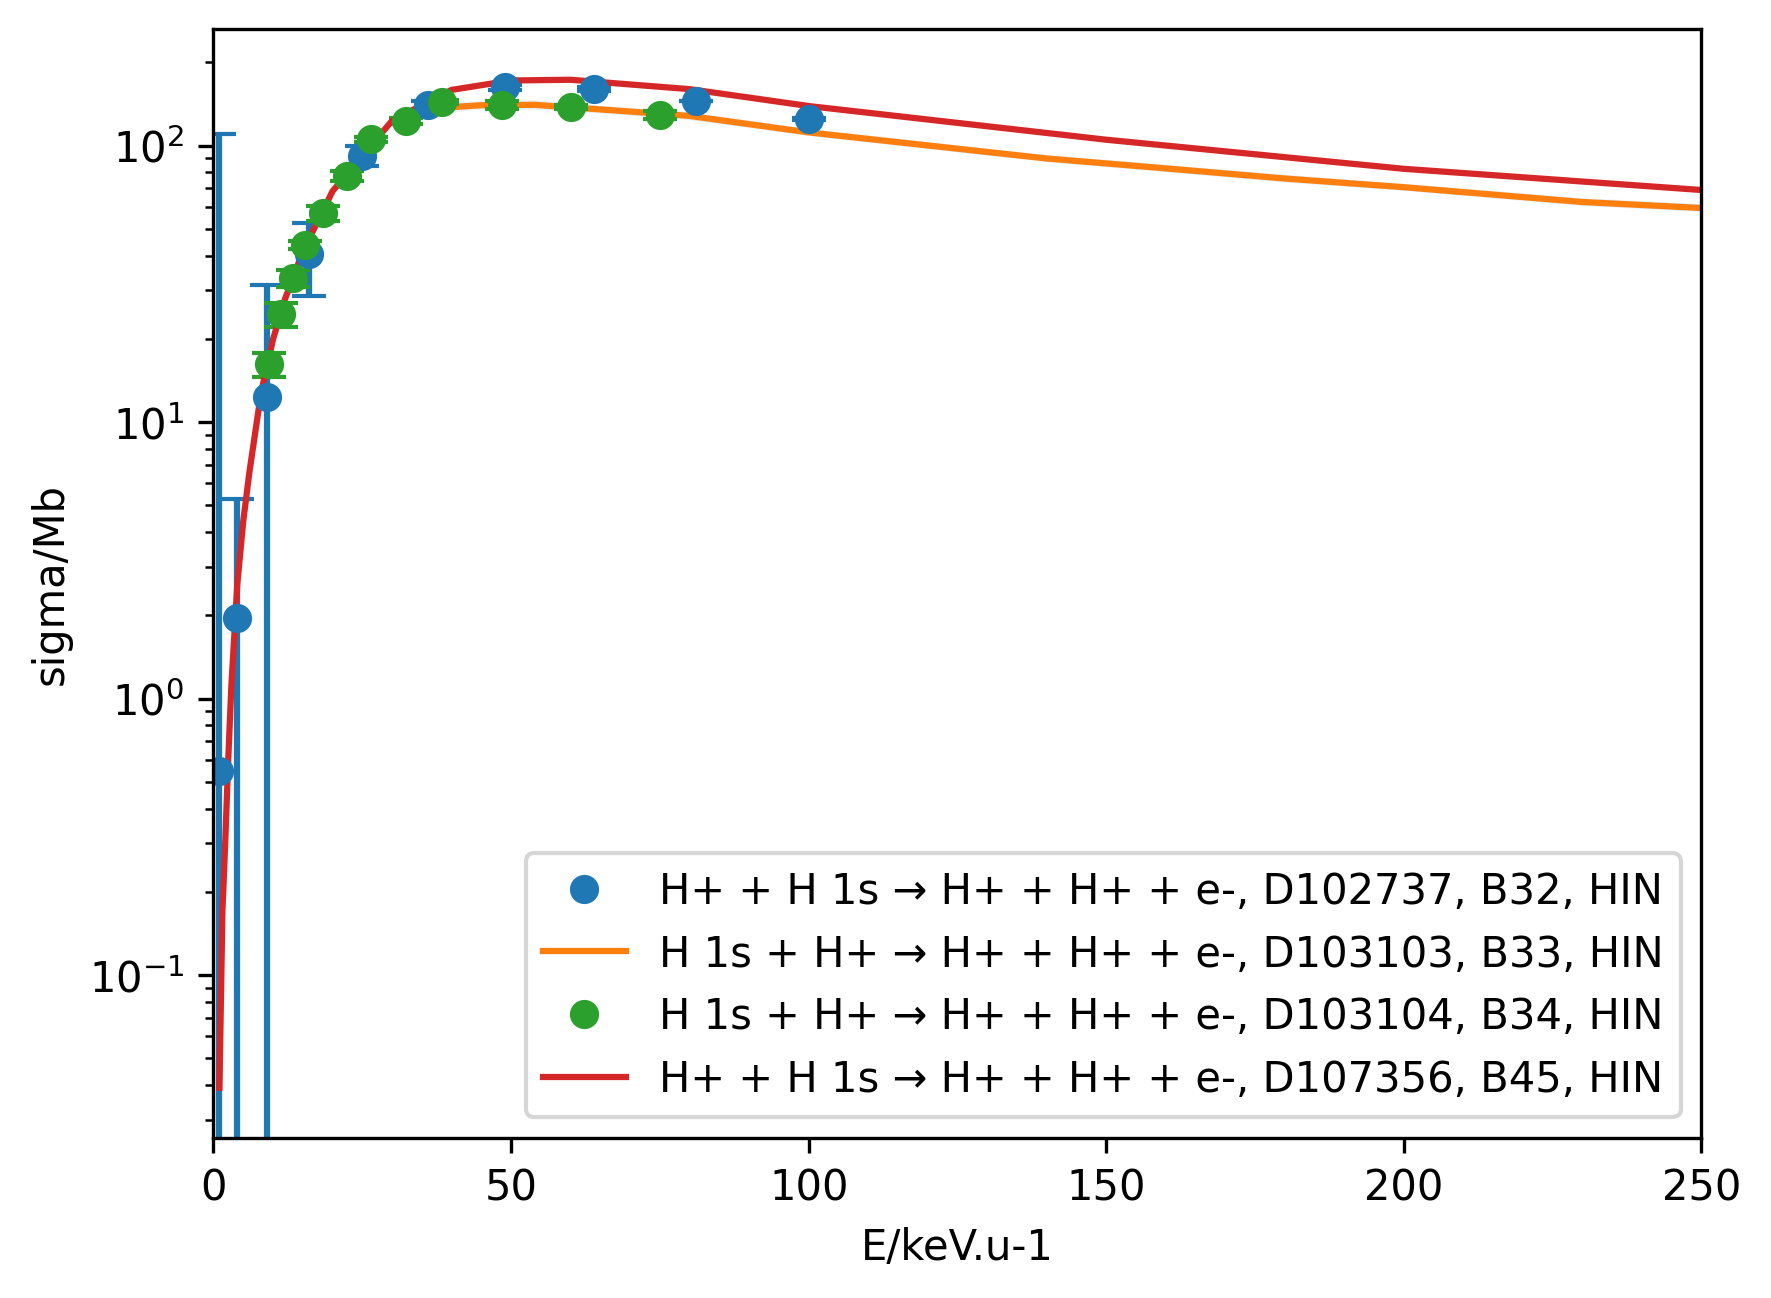

In [27]:
# Make a plot, indicating how the data should be labelled.
DPI = 300
fig, ax = plt.subplots(dpi=DPI)
pycoll.plot_all_datasets(ax, label=('reaction', 'qid', 'refs', 'process_types'))
#pycoll.plot_all_datasets(ax, label=('qid', 'refs', 'process_types'))
plt.xlim(0, 250)
plt.legend()
plt.savefig('pycollisiondb-plot-example.png', dpi=DPI)

In [26]:
plt.savefig('pycollisiondb-plot-example.png', dpi=DPI)

<Figure size 640x480 with 0 Axes>